<a href="https://colab.research.google.com/github/eddiebenchan/ACL_White_Sox/blob/master/ACL_White_Sox_Model_Building_Attendance_Re_Run_for_Packages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##imports
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
##add the csvs 
uploaded = files.upload()

Saving 2016_rev.csv to 2016_rev.csv
Saving 2017_rev.csv to 2017_rev.csv
Saving 2018_rev.csv to 2018_rev.csv
Saving 2019_rev.csv to 2019_rev.csv
Saving B&B and F4P Data_Eddie.csv to B&B and F4P Data_Eddie.csv
Saving Chicago_weather.csv to Chicago_weather.csv
Saving White Sox Attendance by game 2016-2019.csv to White Sox Attendance by game 2016-2019.csv
Saving White Sox Promotions 2016-2019.csv to White Sox Promotions 2016-2019.csv
Saving White Sox Records.csv to White Sox Records.csv


In [0]:
## save to pandas
bnb_f4p = pd.read_csv(io.StringIO(uploaded['B&B and F4P Data_Eddie.csv'].decode('utf-8')))
attendance_2016_2019 = pd.read_csv(io.StringIO(uploaded['White Sox Attendance by game 2016-2019.csv'].decode('utf-8')))
promo_2016_2019 = pd.read_csv(io.StringIO(uploaded['White Sox Promotions 2016-2019.csv'].decode('utf-8')))
rev_2016 = pd.read_csv(io.StringIO(uploaded['2016_rev.csv'].decode('utf-8')))
rev_2017 = pd.read_csv(io.StringIO(uploaded['2017_rev.csv'].decode('utf-8')))
rev_2018 = pd.read_csv(io.StringIO(uploaded['2018_rev.csv'].decode('utf-8')))
rev_2019 = pd.read_csv(io.StringIO(uploaded['2019_rev.csv'].decode('utf-8')))
records = pd.read_csv(io.StringIO(uploaded['White Sox Records.csv'].decode('utf-8')))
weather = pd.read_csv(io.StringIO(uploaded['Chicago_weather.csv'].decode('utf-8')))


In [0]:
## adjust columns
promo_2016_2019["game_date"] = pd.DatetimeIndex(promo_2016_2019['game_time_local']).date
attendance_2016_2019.EventDate = pd.to_datetime(attendance_2016_2019.EventDate)
promo_2016_2019.game_date = pd.to_datetime(promo_2016_2019.game_date)
attendance_2016_2019 = attendance_2016_2019.rename(columns={' PaidIssued ': 'PaidIssued'})
attendance_2016_2019 = attendance_2016_2019.rename(columns={' TotalScans ': 'TotalScans'})
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].str.strip()
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].str.strip()
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].replace("-", 0)
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].replace("-", 0)
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].str.replace(",","").astype(float)
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].str.replace(",","").astype(float)
attendance_2016_2019["PaidIssued"] = attendance_2016_2019["PaidIssued"].fillna(0)
attendance_2016_2019["TotalScans"] = attendance_2016_2019["TotalScans"].fillna(0)
records['Date'] = pd.to_datetime(records.Date)
weather['DATE'] = pd.to_datetime(weather.DATE)

records['Wins'] = records['Wins'].astype(str).astype(float)
records['Losses'] = records['Losses'].astype(str).astype(float)
records['Win_pct'] = records['Win_pct'].astype(str).str.strip('%').astype(float)
weather["PRCP"] = weather["PRCP"].fillna(0)
weather["temp_avg"] = weather["temp_avg"].fillna(0)
weather["TMAX"] = weather["TMAX"].fillna(0)
weather["TMIN"] = weather["TMIN"].fillna(0)

In [0]:
revenue = rev_2016.append(rev_2017)
revenue = revenue.append(rev_2018)
revenue = revenue.append(rev_2019)

##merging to a single dataframe
attendance = pd.merge(attendance_2016_2019, bnb_f4p, left_on = ("Season", "EventName"), right_on = ("Year", "Event Name"), how = 'left')
##attendance = pd.merge(attendance, promo_2016_2019, left_on = ("EventDate"), right_on = ("game_date"), how = 'left')
attendance = pd.merge(attendance, revenue, left_on = ("EventDateKey"), right_on = ("DateKey"), how = 'left')
attendance = pd.merge(attendance, records, left_on = "EventDate", right_on = "Date", how = "left")
attendance = pd.merge(attendance, weather, left_on = "EventDate", right_on = "DATE", how = "left")

##add columns
attendance['f4p_y_n'] = attendance['F4P Sold'].apply(lambda x: '1' if x > 0 else '0')
attendance['b_b_y_n'] = attendance['B&B Sold'].apply(lambda x: '1' if x > 0 else '0')
attendance["F4P Sold"] = attendance["F4P Sold"].fillna(0)
attendance["B&B Sold"] = attendance["B&B Sold"].fillna(0)
attendance["Wins"] = attendance["Wins"].fillna(0)
attendance["Losses"] = attendance["Losses"].fillna(0)
attendance["Season Rolling Average Runs"] = attendance["Season Rolling Average Runs"].fillna(0)
attendance["PRCP"] = attendance["PRCP"].fillna(0)
attendance["temp_avg"] = attendance["temp_avg"].fillna(0)
attendance["TMAX"] = attendance["TMAX"].fillna(0)
attendance["TMIN"] = attendance["TMIN"].fillna(0)
attendance["Win_pct"] = attendance["Win_pct"].fillna(0)

##a = ['RAINED OUT 5/27', 'ST. LOUIS CARDINALS', 'PITTSBURGH PIRATES', 'PHILADELPHIA PHILLIES', 'LOS ANGELES DODGERS', 
##     'ATLANTA BRAVES', 'SF GIANTS', 'SAN DIEGO PADRES', 'NEW YORK METS', 'MILWAUKEE BREWERS', 'MIAMI MARLINS', 'NY YANKEES', 'WASHINGTON NATIONALS', 'CHICAGO CUBS']
##attendance = attendance.replace(to_replace = ['RAINED OUT 5/27', 'ST. LOUIS CARDINALS', 'PITTSBURGH PIRATES', 'PHILADELPHIA PHILLIES', 'LOS ANGELES DODGERS', 
##     'ATLANTA BRAVES', 'SF GIANTS', 'SAN DIEGO PADRES', 'NEW YORK METS', 'MILWAUKEE BREWERS', 'MIAMI MARLINS', 'NY YANKEES', 'WASHINGTON NATIONALS', 'CHICAGO CUBS'],
##     value = "Other")

##Rain Outs to Remove: 4/10/2016, 4/5/2017, 5/8/2017, 5/10/2017
##Doubleheaders to Remove: 5/23/2016, 5/27/2017, 8/21/2017, 4/28/2018. 6/5/2018, 6/22/2018, 9/28/2018, 5/1/2019, 7/3/2019, 8/6/2019, 8/13/2019, 9/28/2019,
dates = [20160410, 20170405, 20170508, 20170510, 20160523, 20170527, 20170821, 20180428, 20180605, 20180622, 20180928, 20190501, 20190703, 20190806, 20190813, 20190928]
attendance = attendance[~attendance['EventDateKey'].isin(dates)]

In [0]:
X = attendance.iloc[:,7].values.reshape(-1,1)
Y = attendance.iloc[:,15].values.reshape(-1,1)
linear_regressor = LinearRegression(fit_intercept = False)
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred, color='red')
plt.xlabel("Attendance")
plt.ylabel("Revenue")
plt.show()
r_sq = linear_regressor.score(X,Y)
print('coefficient of determination:', r_sq)
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

NameError: ignored

In [0]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
from sklearn import tree
import pydotplus
from IPython.display import Image 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import datasets
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score,explained_variance_score
from sklearn.linear_model import LinearRegression


X = attendance.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'DateKey','Revenue', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance.TotalScans


In [0]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)
Xscaled = add_constant(Xscaled)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)
lin_model = OLS(y_train, X_train).fit()

lin_pred = lin_model.predict(X_test)
lin_model_score = r2_score(y_test, lin_pred)

print ("R^2 score:", lin_model_score)


R^2 score: 0.278987574237198


In [0]:
def evaluate(model):        
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    model_score = r2_score(y_test, pred)
    
    s = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
        
    print ("R^2 score:", model_score)
    print ("Cross Validation Score: {:0.5} ± {:0.5}".format(s.mean().round(5), s.std().round(5)))
    
  
    errors = abs(pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    df = pd.DataFrame(columns=['attendance', 'predictions', 'residuals'])
    df.attendance = y
    df.predictions = model.predict(Xscaled)
    df.residuals = df.attendance - df.predictions
    df.plot(x='predictions', y='residuals', kind='scatter')
    plt.show()

In [0]:
def feat_imp(model):
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']
                                      ).sort_values('importance', ascending=False).reset_index()
    print (feature_importances)
    return feature_importances

R^2 score: 0.5427215421389892
Cross Validation Score: 0.42708 ± 0.28929
Model Performance
Average Error: 4087.5776 degrees.
Accuracy = 72.96%.


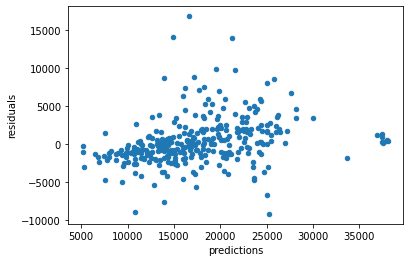

CPU times: user 1.09 s, sys: 136 ms, total: 1.22 s
Wall time: 5.98 s


In [0]:
## Random Forest
X = attendance.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'DateKey','Revenue', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance.TotalScans
ss = StandardScaler()
Xscaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)
rf = RandomForestRegressor(n_estimators=300)
%time evaluate(rf)
##.65

In [0]:
rf_featimp = feat_imp(rf)


                          index  importance
0             Team_CHICAGO CUBS    0.257470
1                          Wins    0.129757
2              DayName_Saturday    0.093640
3                          TMAX    0.066285
4                DayName_Sunday    0.057307
5                      temp_avg    0.045729
6                       Win_pct    0.043496
7                        Losses    0.040914
8   Season Rolling Average Runs    0.038634
9                          TMIN    0.036093
10                         PRCP    0.022472
11               DayName_Friday    0.018172
12          Team_TAMPA BAY RAYS    0.017498
13        Team_NEW YORK YANKEES    0.016846
14              DayName_Tuesday    0.013326
15          MonthName_September    0.012843
16               MonthName_July    0.009387
17       Team_CLEVELAND INDIANS    0.008587
18                       Season    0.008246
19                Day_Night_day    0.005876
20              Day_Night_night    0.005761
21      Team_KANSAS CITY ROYALS 

In [0]:
 def rf_rs():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}
    print(random_grid)
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    print(rf_random.best_params_, rf_random.best_score_)

In [0]:
%time rf_rs()

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


{'n_estimators': 261, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False} 0.6027476814400211
CPU times: user 1.47 s, sys: 44.7 ms, total: 1.52 s
Wall time: 3min 20s


In [0]:
def rf_gs():
    params = {
        'max_features' : [1, 2,'auto', 'sqrt'],
        'max_depth' : [20, 30, 50, 60, None],
        'n_estimators' : [250, 261, 350, 400],
        'min_samples_split' : [1,2,3,4,5],
        'min_samples_leaf' : [1,2],
        'bootstrap' : [False]
    }

    gs_rf = GridSearchCV(rf, params, n_jobs=-1, cv=5)
    gs_rf.fit(X_train, y_train)

    print (gs_rf.best_params_, gs_rf.best_score_)

In [0]:
%time rf_gs()


{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250} 0.6225342612327907
CPU times: user 15.6 s, sys: 600 ms, total: 16.2 s
Wall time: 20min 35s


In [0]:
rf2 = RandomForestRegressor(n_estimators=35, max_features='auto' , max_depth= None, min_samples_leaf= 1, min_samples_split= 2)

##r^2 = .649 (n_estimators=35, max_features='auto' , max_depth= None, min_samples_leaf= 1, min_samples_split= 2)

R^2 score: 0.586572138204849
Cross Validation Score: 0.41379 ± 0.28115
Model Performance
Average Error: 3706.5631 degrees.
Accuracy = -inf%.


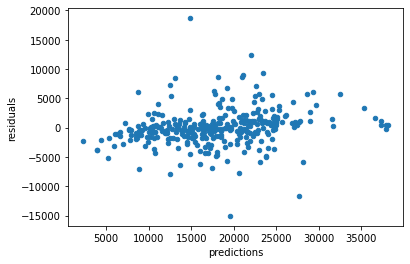

CPU times: user 339 ms, sys: 107 ms, total: 446 ms
Wall time: 767 ms


In [0]:
%time evaluate(rf2)


In [0]:
rf2_featimp = feat_imp(rf2)


                          index  importance
0                          Wins    0.159544
1              DayName_Saturday    0.150239
2             Team_CHICAGO CUBS    0.142174
3                        Losses    0.084131
4                       Win_pct    0.068242
5   Season Rolling Average Runs    0.051161
6                DayName_Sunday    0.046729
7                          TMAX    0.045507
8                      temp_avg    0.037963
9                DayName_Friday    0.037506
10               MonthName_July    0.035528
11                         TMIN    0.024135
12                         PRCP    0.017798
13          MonthName_September    0.011960
14              DayName_Tuesday    0.011473
15        Team_NEW YORK YANKEES    0.006464
16          Team_BOSTON RED SOX    0.006206
17                       Season    0.004979
18              Day_Night_night    0.004818
19      Team_KANSAS CITY ROYALS    0.004640
20       Team_CLEVELAND INDIANS    0.004353
21            DayName_Wednesday 

R^2 score: 0.5857687931014783
Cross Validation Score: 0.41051 ± 0.29759
Model Performance
Average Error: 3832.4989 degrees.
Accuracy = 77.27%.


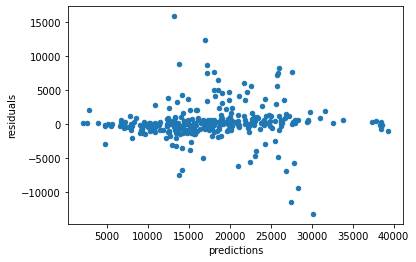

CPU times: user 521 ms, sys: 133 ms, total: 654 ms
Wall time: 2.97 s


In [0]:
##Gradient Boosting Regressor
X = attendance.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'DateKey','Revenue', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance.TotalScans
ss = StandardScaler()
Xscaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)
gbr = GradientBoostingRegressor(n_estimators=300)
%time evaluate(gbr)
##R^2 = 0.6677

In [0]:
def gbr_gs():
    params = {
        'max_features' : [0.5, 0.75,3,5,7, 'auto', 'sqrt'],
        'max_depth' : [3,4,6,20, 30, None],
        'n_estimators' : [10, 20, 50, 100,200,300],
        'min_samples_split' : [1,2,3],
        'min_samples_leaf' : [1,2,3],
        ##'max_features' : [0.75, 'auto', 'sqrt'],
        ##'max_depth' : [30, 40,None],
        ##'n_estimators' : [200, 300],
        ##'min_samples_split' : [2],
        ##'min_samples_leaf' : [2],
        'learning_rate' : [0.15,0.1,0.05,0.01],
    }

    gs_gbr = GridSearchCV(gbr, params, n_jobs=-1, cv=5)
    gs_gbr.fit(X_train, y_train)

    print (gs_gbr.best_params_, gs_gbr.best_score_)

In [0]:
%time gbr_gs()


{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300} 0.6244538927416887
CPU times: user 1min 2s, sys: 1 s, total: 1min 3s
Wall time: 31min 51s


R^2 score: 0.6472367626914168
Cross Validation Score: 0.40909 ± 0.29914
Model Performance
Average Error: 3615.1242 degrees.
Accuracy = 77.12%.


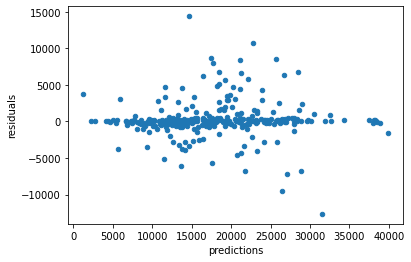

CPU times: user 410 ms, sys: 101 ms, total: 511 ms
Wall time: 1.08 s


In [0]:
gbr2 = GradientBoostingRegressor(n_estimators=600, max_features= 3, max_depth=3, min_samples_leaf= 1, min_samples_split= 3, learning_rate=0.15)
%time evaluate(gbr2)

##R^2 = 0.68651 (n_estimators=400, max_features= 'sqrt', max_depth=6, min_samples_leaf= 1, min_samples_split= 3, learning_rate=0.1)
##R^2 = 0.68651 (n_estimators=100, max_features= 'sqrt', max_depth=4, min_samples_leaf= 3, min_samples_split= 3, learning_rate=0.1)

In [0]:
gbr2_featimp = feat_imp(gbr2)


                          index  importance
0             Team_CHICAGO CUBS    0.167639
1                          Wins    0.099974
2              DayName_Saturday    0.078463
3                        Losses    0.055080
4   Season Rolling Average Runs    0.050455
5                          TMAX    0.045959
6                          TMIN    0.043367
7                      temp_avg    0.042151
8                MonthName_July    0.038947
9                       Win_pct    0.037819
10          Team_TAMPA BAY RAYS    0.036294
11              DayName_Tuesday    0.033212
12               DayName_Sunday    0.026690
13        Team_NEW YORK YANKEES    0.024128
14                         PRCP    0.021082
15          MonthName_September    0.020320
16              MonthName_April    0.019128
17            DayName_Wednesday    0.015932
18               DayName_Monday    0.014821
19              Day_Night_night    0.010700
20          Team_BOSTON RED SOX    0.009022
21                       Season 

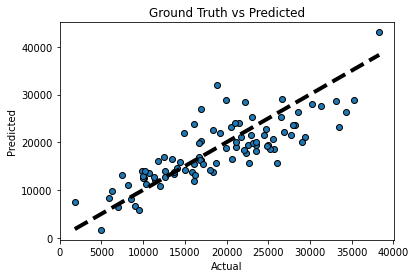

In [0]:
y_predicted = gbr2.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [0]:
##df.sort_values(by='col1', ascending=True)
y_test.sort_values(ascending=True)

170     1800.0
252     4931.0
178     5926.0
295     6323.0
189     6968.0
        ...   
276    33077.0
280    33478.0
110    34320.0
313    35342.0
260    38310.0
Name: TotalScans, Length: 93, dtype: float64

In [0]:
attendance.loc[attendance['TotalScans'].isin([1800.0,4931.0])]

,Season,EventName,EventDateKey,EventDate,Team,DayName,MonthName,TotalScans,PaidIssued,Year,Event Name,B&B Sold,F4P Sold,Unnamed: 4,DateKey,Revenue,Date,Day_Night,Wins,Losses,Occurences,RunsScored,Season Rolling Average Runs,Win_pct,STATION,NAME,DATE,DATEKEY,PRCP,TMAX,TMIN,temp_avg,f4p_y_n,b_b_y_n
170,2018,ESX0409,20180409,2018-04-09,TAMPA BAY RAYS,Monday,April,1800.0,10377.0,NaN,NaN,0.0,0.0,NaN,20180409,48527.19,2018-04-09,day,3.0,6.0,1.0,4.0,4.555556,33.3333,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",2018-04-09,20180409,0.12,40.0,32.0,36.0,0,0
252,2019,ESOX0409,20190409,2019-04-09,TAMPA BAY RAYS,Tuesday,April,4931.0,10795.0,NaN,NaN,0.0,0.0,NaN,20190409,130204.67,2019-04-09,day,3.0,7.0,1.0,5.0,5.111111,30.0000,USC00111577,"CHICAGO MIDWAY AIRPORT 3 SW, IL US",2019-04-09,20190409,0.00,68.0,41.0,54.5,0,0


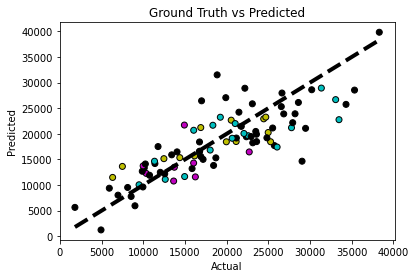

In [0]:
df = ss.inverse_transform(X_test)
df = pd.DataFrame(df)      
df[57] = np.where(df[56]==1,'y','k') ##bleachers and brews
df[58] = np.where(df[54]==1,'r','k') ##f4p 

def f(row):
    if row[57] == 'y':
        if row[58] == 'r':
          val = 'y' ##both
        else:
          val = 'm' ##bnb
    elif row[58] == 'r':
        val = 'c'  ## f4P
    else:
        val = 'k'
    return val

df[59] = df.apply(f,axis =1)

colors = df[59]

y_predicted = gbr2.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, c=colors,edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


No handles with labels found to put in legend.


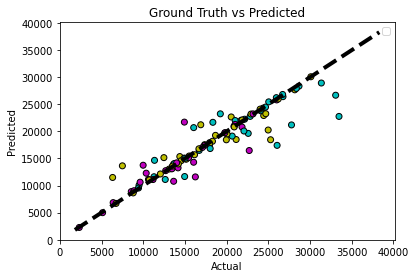

In [0]:

df2 = X.copy()
##df2 = ss.inverse_transform(df2)
##df2 = pd.DataFrame(df2)      

##df2[57] = np.where(df2['b_b_y_n_0']==0,'y','k') ##bleachers and brews
##df2[58] = np.where(df2['f4p_y_n_0']==0,'r','k') ##f4p 

def f(row):
    if row[56] == 1:
        if row[54] == 1:
          val = 'y' ## both
        else:
          val = 'm' ## bleachers n brews
    elif row[54] == 1:
        val = 'c' ##f4p
    else:
        val = 'k' ##none
    return val

df2[59] = df2.apply(f,axis =1)



y_predicted_full = gbr2.predict(Xscaled)
df2['pred']=y_predicted_full
df2['actuals'] =y
df2=df2.loc[df2[59]!='k']
colors2 = df2[59]

fig, ax = plt.subplots()
ax.scatter(df2['actuals'], df2['pred'], c=colors2, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
ax.legend()
plt.show()

In [0]:

attendance.to_csv('Overall AttendanceRevenue Model Data.csv')
files.download('Overall AttendanceRevenue Model Data.csv')

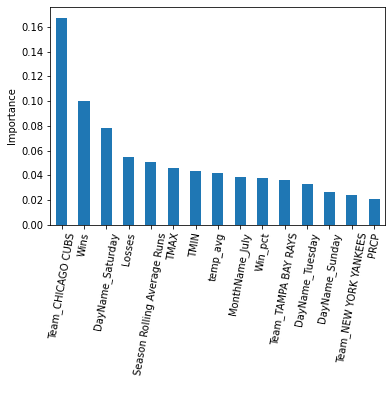

In [0]:
gbr2_featimp[0:15].plot(x='index', y='importance', kind='bar', rot=80)
# plt.title('Feature Importances', fontsize=25)
plt.xlabel('   ')
plt.ylabel('Importance')
plt.legend().set_visible(False)

In [0]:
##XGBoost Regressor following https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
X = attendance.drop(['EventName', 'EventDateKey', 'EventDate', 'TotalScans','PaidIssued','Year', 'Event Name', 'B&B Sold', 'F4P Sold', 'Unnamed: 4',
                     'DateKey','Revenue', 'Date', 'Occurences', 'RunsScored', 'STATION', 'NAME', 'DATE', 'DATEKEY'], axis = 1)
X = pd.get_dummies(X)
y= attendance.TotalScans
ss = StandardScaler()
Xscaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.3, random_state = 86)


# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))




dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

params['eval_metric'] = "mae"
num_boost_round = 999

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

##xg_reg.fit(X_train,y_train)
##%time evaluate(xg_reg)
##preds = xg_reg.predict(X_test)

##rmse = np.sqrt(mean_squared_error(y_test, preds))
##print("RMSE: %f" % (rmse))
##xgb.plot_importance(xg_reg)
##plt.rcParams['figure.figsize'] = [5, 5]
##plt.show()

Baseline MAE is 6387.11
[0]	Test-mae:13663.4
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:10040.8
[2]	Test-mae:7794.46
[3]	Test-mae:6323.47
[4]	Test-mae:5520.45
[5]	Test-mae:4886.6
[6]	Test-mae:4499.66
[7]	Test-mae:4218.45
[8]	Test-mae:4118.92
[9]	Test-mae:4067.09
[10]	Test-mae:3973.88
[11]	Test-mae:3960.17
[12]	Test-mae:3940.83
[13]	Test-mae:3943.01
[14]	Test-mae:3917.76
[15]	Test-mae:3919.04
[16]	Test-mae:3913.71
[17]	Test-mae:3913.46
[18]	Test-mae:3915.96
[19]	Test-mae:3904.98
[20]	Test-mae:3867.14
[21]	Test-mae:3845.23
[22]	Test-mae:3826.87
[23]	Test-mae:3819.84
[24]	Test-mae:3821.88
[25]	Test-mae:3829.77
[26]	Test-mae:3834.18
[27]	Test-mae:3830.47
[28]	Test-mae:3820.84
[29]	Test-mae:3827.59
[30]	Test-mae:3824.14
[31]	Test-mae:3816.71
[32]	Test-mae:3820.95
[33]	Test-mae:3811.63
[34]	Test-mae:3798.49
[35]	Test-mae:3794.7
[36]	Test-mae:3797.97
[37]	Test-mae:3799.08
[38]	Test-mae:3793.31
[39]	Test-mae:3791.21
[40]	Test-mae:3790.01
[41]	Test-mae:3788.7
[42]	Test

In [0]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results
## 3974 ## cv_results['test-mae-mean'].min() 


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,4749.037012,346.670253,11414.422363,4509.013165
1,3516.867578,98.197906,11149.317236,5384.291803
2,3147.962110,84.015536,11018.289453,5520.792816
3,2952.009375,76.496357,10925.579492,5531.463632
4,2839.940869,79.470329,10886.183984,5519.324774
5,2769.187842,89.038462,10876.827783,5517.483038
6,2721.572559,94.862082,10876.511768,5523.084823


In [0]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,12)
    for min_child_weight in range(1,8)
]

# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))


CV with max_depth=1, min_child_weight=1
	MAE 3738.0880372 for 100 rounds
CV with max_depth=1, min_child_weight=2
	MAE 3757.7860840000003 for 93 rounds
CV with max_depth=1, min_child_weight=3
	MAE 3753.8369141999997 for 81 rounds
CV with max_depth=1, min_child_weight=4
	MAE 3823.6592773999996 for 101 rounds
CV with max_depth=1, min_child_weight=5
	MAE 4105.704004 for 75 rounds
CV with max_depth=1, min_child_weight=6
	MAE 4046.8337400000005 for 74 rounds
CV with max_depth=1, min_child_weight=7
	MAE 4118.0708005999995 for 77 rounds
CV with max_depth=2, min_child_weight=1
	MAE 3807.0452147999995 for 42 rounds
CV with max_depth=2, min_child_weight=2
	MAE 3777.4724122 for 50 rounds
CV with max_depth=2, min_child_weight=3
	MAE 3838.1398925999993 for 39 rounds
CV with max_depth=2, min_child_weight=4
	MAE 3937.7546385999995 for 38 rounds
CV with max_depth=2, min_child_weight=5
	MAE 4218.1266602000005 for 31 rounds
CV with max_depth=2, min_child_weight=6
	MAE 4276.3168458 for 27 rounds
CV with m

In [0]:
params['max_depth'] = 1
params['min_child_weight'] = 1

gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(1,11)]
    for colsample in [i/10. for i in range(1,11)]
]

min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.9
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.8
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.7
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.6
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.5
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.4
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.3
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.2
	MAE 10876.511767599999 for 6 rounds
CV with subsample=1.0, colsample=0.1
	MAE 10876.511767599999 for 6 rounds
CV with subsample=0.9, colsample=1.0
	MAE 10876.511767599999 for 6 rounds
CV with subsample=0.9, colsample=0.9
	MAE 10876.511767599999 for 6 rounds
CV with subsample=0.9, colsample=0.8
	MAE 10876.511767599999 for 6 rounds
CV with subsample=0.9, colsample=0.7
	

In [0]:
params['subsample'] = .8
params['colsample_bytree'] = .7

%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.82 µs
CV with eta=0.3
CPU times: user 525 ms, sys: 6.98 ms, total: 532 ms
Wall time: 535 ms
	MAE 3786.5934571999996 for 54 rounds

CV with eta=0.2
CPU times: user 667 ms, sys: 7 ms, total: 674 ms
Wall time: 674 ms
	MAE 3763.735205 for 76 rounds

CV with eta=0.1
CPU times: user 1.22 s, sys: 12 ms, total: 1.23 s
Wall time: 1.23 s
	MAE 3668.9052736000003 for 153 rounds

CV with eta=0.05
CPU times: user 2.04 s, sys: 22 ms, total: 2.06 s
Wall time: 2.06 s
	MAE 3694.0907225999995 for 266 rounds

CV with eta=0.01
CPU times: user 6.96 s, sys: 76.9 ms, total: 7.04 s
Wall time: 7.05 s
	MAE 3830.5066894 for 939 rounds

CV with eta=0.005
CPU times: user 7.26 s, sys: 88.9 ms, total: 7.35 s
Wall time: 7.36 s
	MAE 4140.9684082 for 998 rounds

Best params: 0.1, MAE: 3668.9052736000003


In [0]:
params['eta'] = .1

params
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:17193.9
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:15668.3
[2]	Test-mae:14209
[3]	Test-mae:12991.3
[4]	Test-mae:11871.7
[5]	Test-mae:10849.9
[6]	Test-mae:10009.2
[7]	Test-mae:9260.16
[8]	Test-mae:8601.42
[9]	Test-mae:8156.58
[10]	Test-mae:7675.69
[11]	Test-mae:7196.31
[12]	Test-mae:6849.96
[13]	Test-mae:6568.17
[14]	Test-mae:6272.77
[15]	Test-mae:6024.44
[16]	Test-mae:5898.29
[17]	Test-mae:5679.76
[18]	Test-mae:5533.21
[19]	Test-mae:5406.59
[20]	Test-mae:5319.58
[21]	Test-mae:5244.07
[22]	Test-mae:5160.96
[23]	Test-mae:5012.21
[24]	Test-mae:4948.41
[25]	Test-mae:4921.35
[26]	Test-mae:4877.17
[27]	Test-mae:4836.84
[28]	Test-mae:4794.97
[29]	Test-mae:4740.98
[30]	Test-mae:4706.19
[31]	Test-mae:4666.43
[32]	Test-mae:4620.82
[33]	Test-mae:4631.18
[34]	Test-mae:4621.69
[35]	Test-mae:4576.93
[36]	Test-mae:4579.21
[37]	Test-mae:4561.58
[38]	Test-mae:4556.53
[39]	Test-mae:4546.26
[40]	Test-mae:4483.44
[41]	Test-mae:4452.63
[42]	Test-mae:4435.76
[43]	Test-

In [0]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

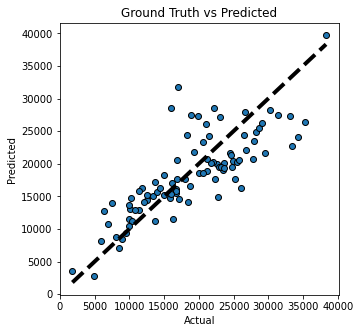

In [0]:
y_predicted = best_model.predict(dtest)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

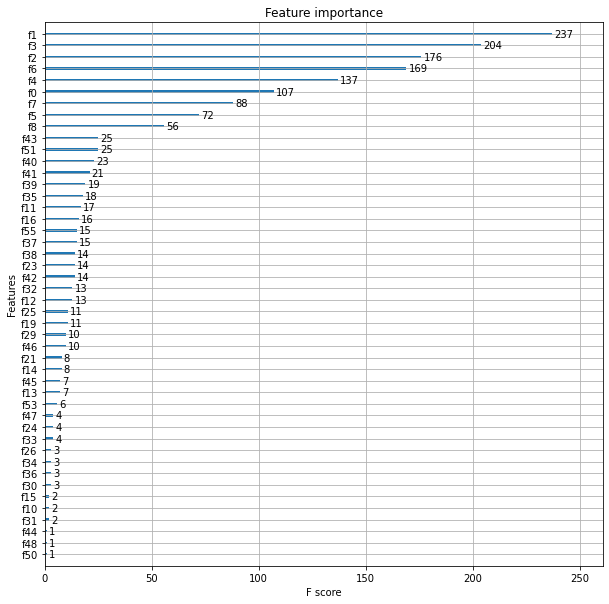

In [0]:
from xgboost import plot_importance

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10,10)
pyplot.show()

In [0]:
X.columns

Index(['Season', 'Wins', 'Losses', 'Season Rolling Average Runs', 'Win_pct',
       'PRCP', 'TMAX', 'TMIN', 'temp_avg', 'Team_ATLANTA BRAVES',
       'Team_BALTIMORE ORIOLES', 'Team_BOSTON RED SOX', 'Team_CHICAGO CUBS',
       'Team_CLEVELAND INDIANS', 'Team_DETROIT TIGERS', 'Team_HOUSTON ASTROS',
       'Team_KANSAS CITY ROYALS', 'Team_LOS ANGELES ANGELS',
       'Team_LOS ANGELES DODGERS', 'Team_MIAMI MARLINS',
       'Team_MILWAUKEE BREWERS', 'Team_MINNESOTA TWINS', 'Team_NEW YORK METS',
       'Team_NEW YORK YANKEES', 'Team_NY YANKEES', 'Team_OAKLAND ATHLETICS',
       'Team_PHILADELPHIA PHILLIES', 'Team_PITTSBURGH PIRATES',
       'Team_RAINED OUT 5/27', 'Team_SAN DIEGO PADRES',
       'Team_SEATTLE MARINERS', 'Team_SF GIANTS', 'Team_ST. LOUIS CARDINALS',
       'Team_TAMPA BAY RAYS', 'Team_TEXAS RANGERS', 'Team_TORONTO BLUE JAYS',
       'Team_WASHINGTON NATIONALS', 'DayName_Friday', 'DayName_Monday',
       'DayName_Saturday', 'DayName_Sunday', 'DayName_Thursday',
       'DayNam